# Install Libraries

In [1]:
%%capture
pip install causalnex

In [2]:
%%capture
pip install cdt

In [3]:
import warnings
#warnings.filterwarnings('ignore')

# Three variables

## One affects

In [8]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    texture_2 = np.random.randint(0, 2, n_samples)
    movability = texture_1
    return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    G.add_edge("Texture_1", "Movability")
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.01
max_iter = 50


# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(20):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(20):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            inferred_graph.add_nodes_from(['Texture_1', 'Texture_2', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Texture_2', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision

    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# Convert results to a DataFrame for display
results_31_df = pd.DataFrame(results)



No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

KeyboardInterrupt: 

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for SHD
color_shd = 'tab:red'
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('SHD', color=color_shd)
ax1.errorbar(results_31_df['n_samples'], results_31_df['shd_avg'], yerr=results_31_df['shd_std'],
             fmt='o-', color=color_shd, ecolor='lightgray', capsize=5, label='SHD ± std dev')
ax1.tick_params(axis='y', labelcolor=color_shd)
ax1.set_ylim(-1, 4)  # Set the limit for SHD axis

# Second y-axis for Precision
ax2 = ax1.twinx()
color_precision = 'tab:blue'
ax2.set_ylabel('Precision', color=color_precision)
ax2.errorbar(results_31_df['n_samples'], results_31_df['precision_avg'], yerr=results_31_df['precision_std'],
             fmt='o-', color=color_precision, ecolor='lightgray', capsize=5, label='Precision ± std dev')
ax2.tick_params(axis='y', labelcolor=color_precision)
ax2.set_ylim(-0.5, 1.5)  # Set the limit for Precision axis

# Title and legend
fig.tight_layout()
plt.title('SHD and Precision over Number of Samples')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))  # Adjust legend position

plt.show()


In [ ]:
print(results_31_df)

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

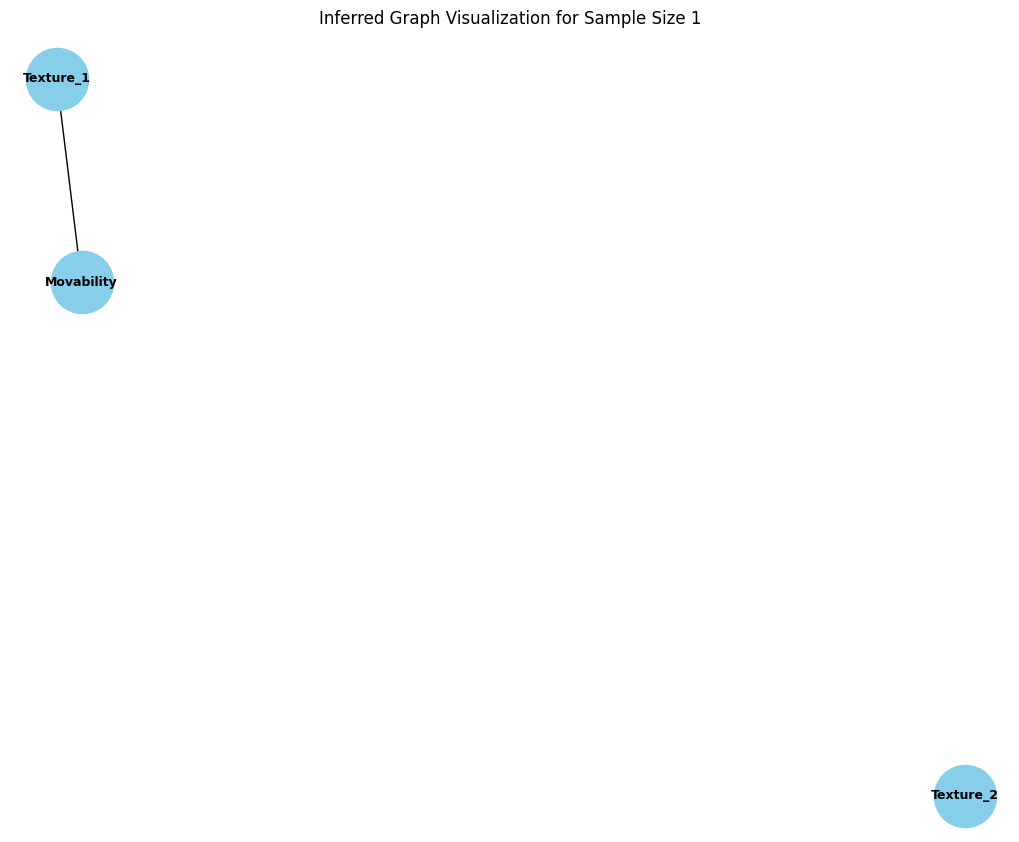

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

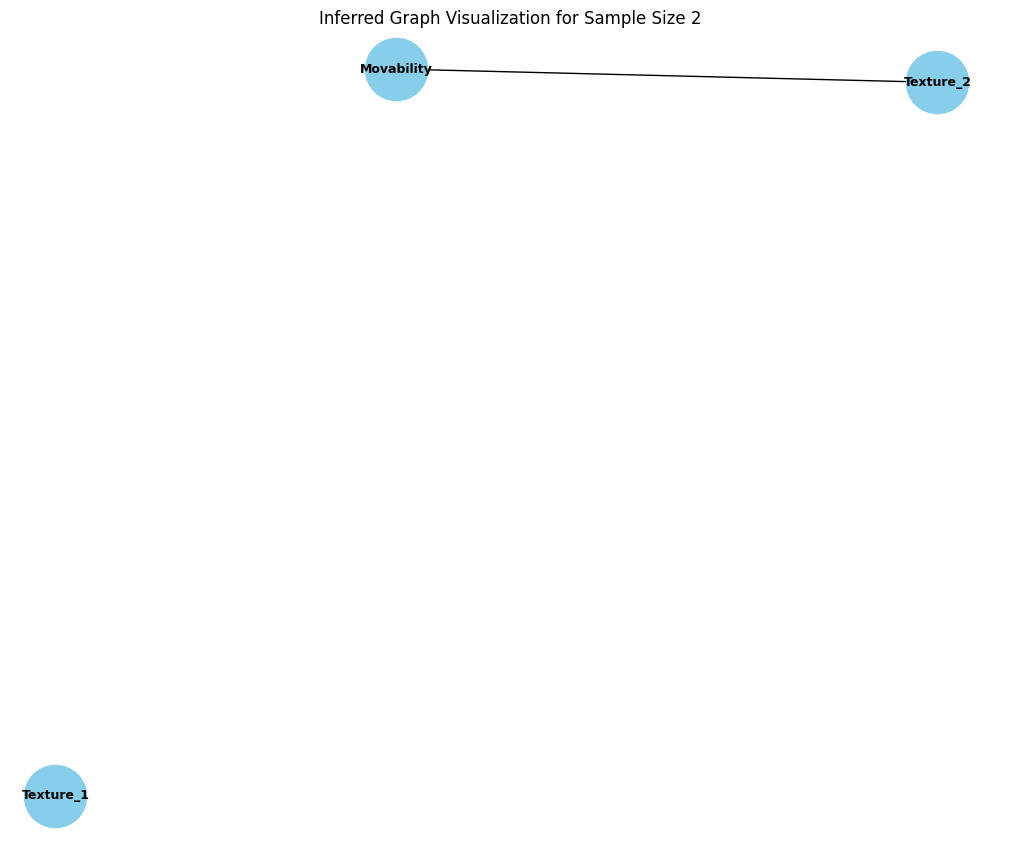

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.


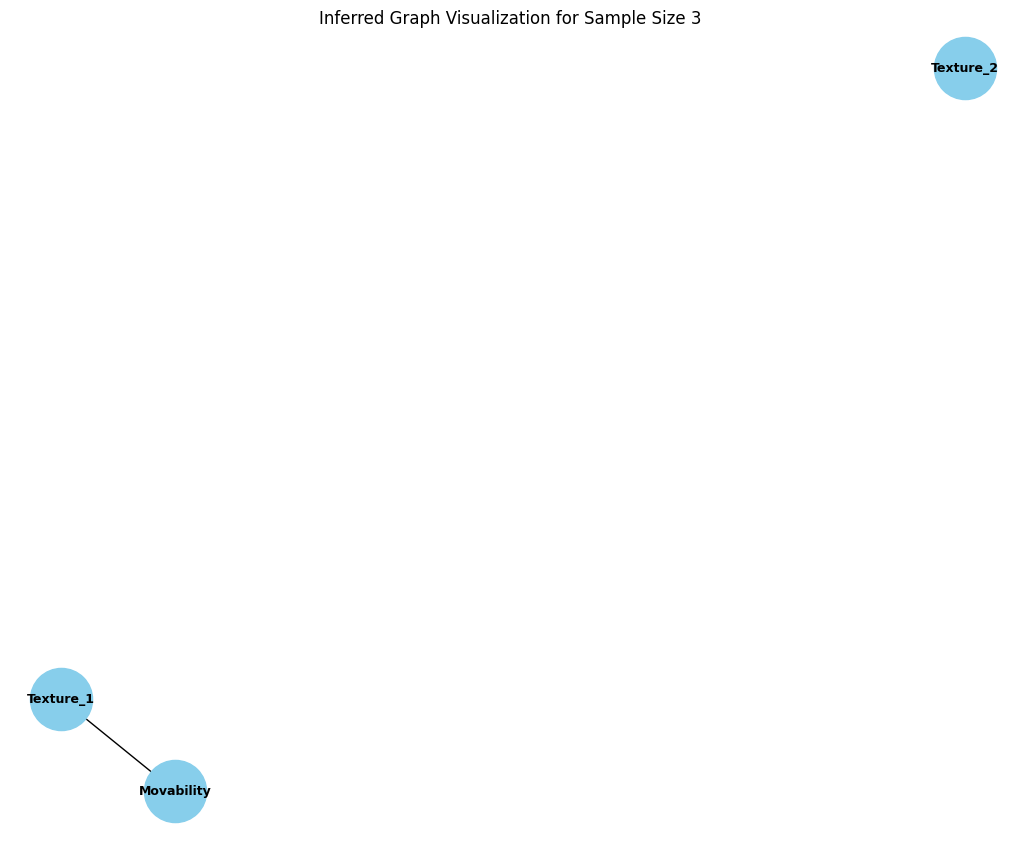

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

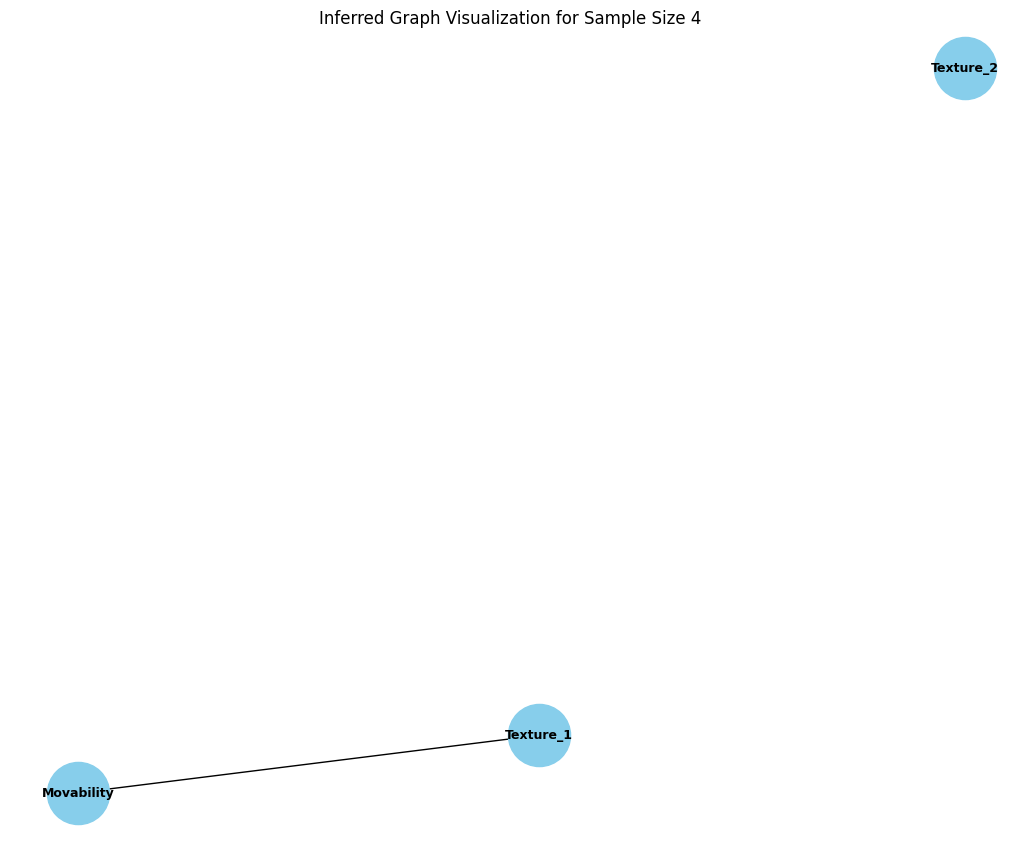

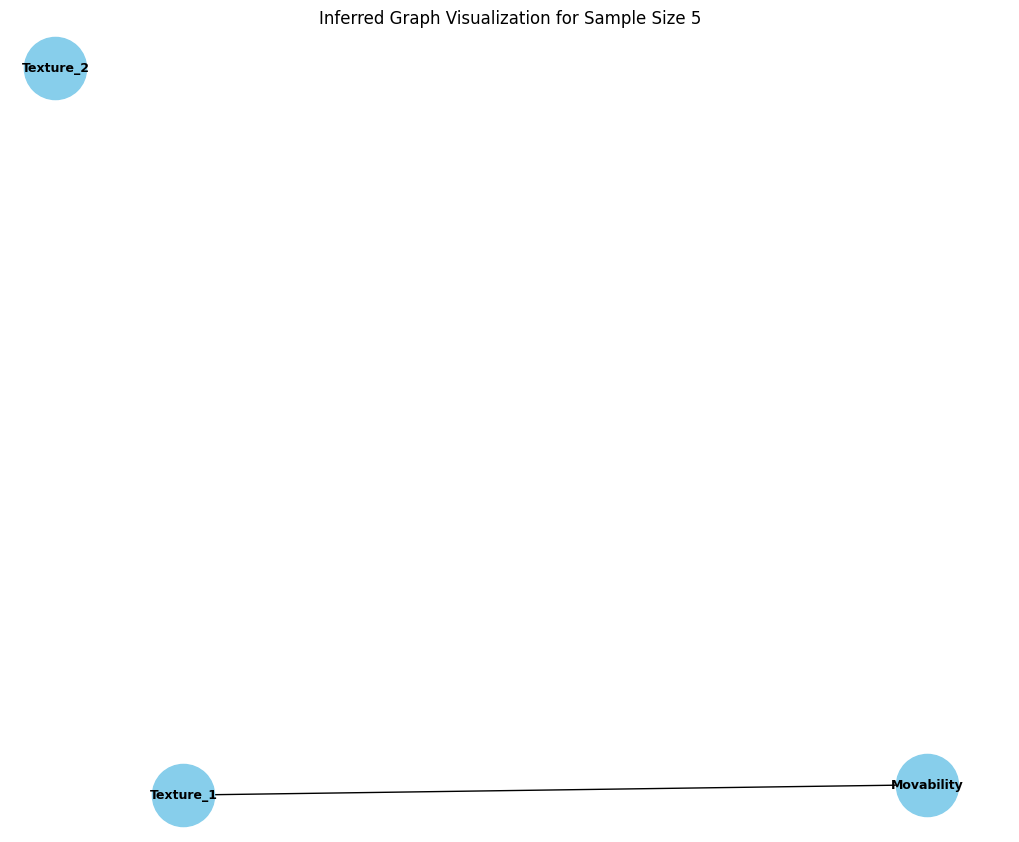

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
in

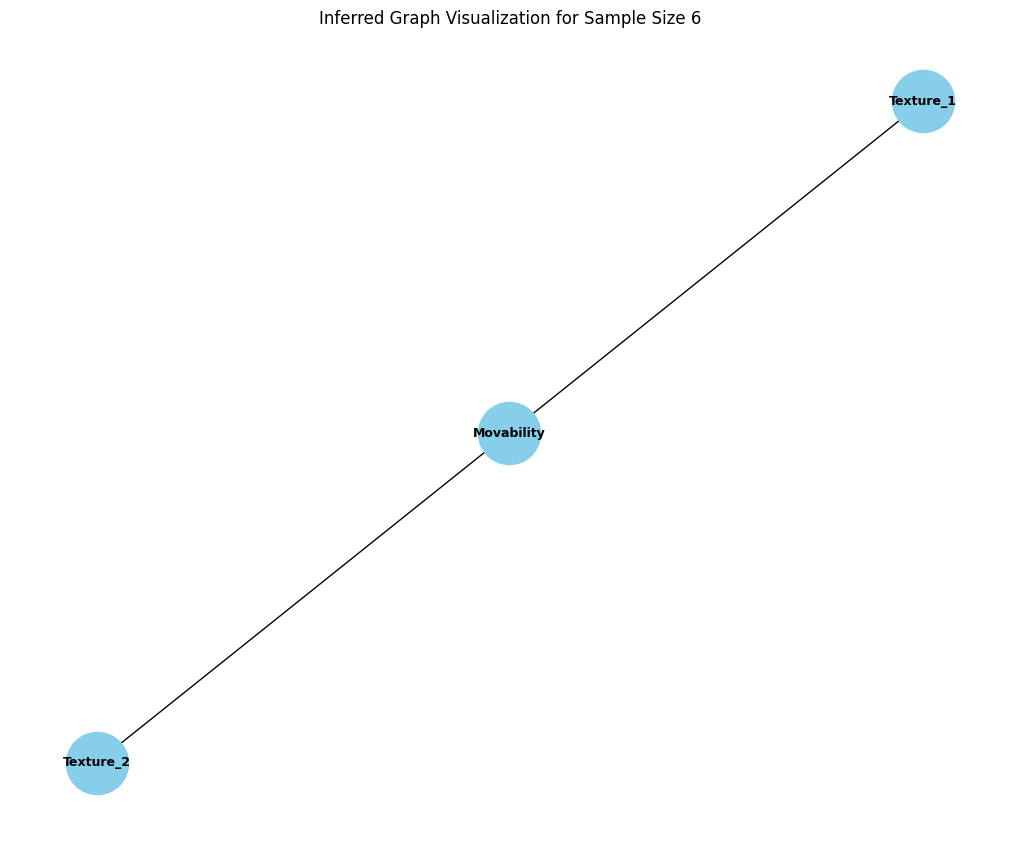

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
in

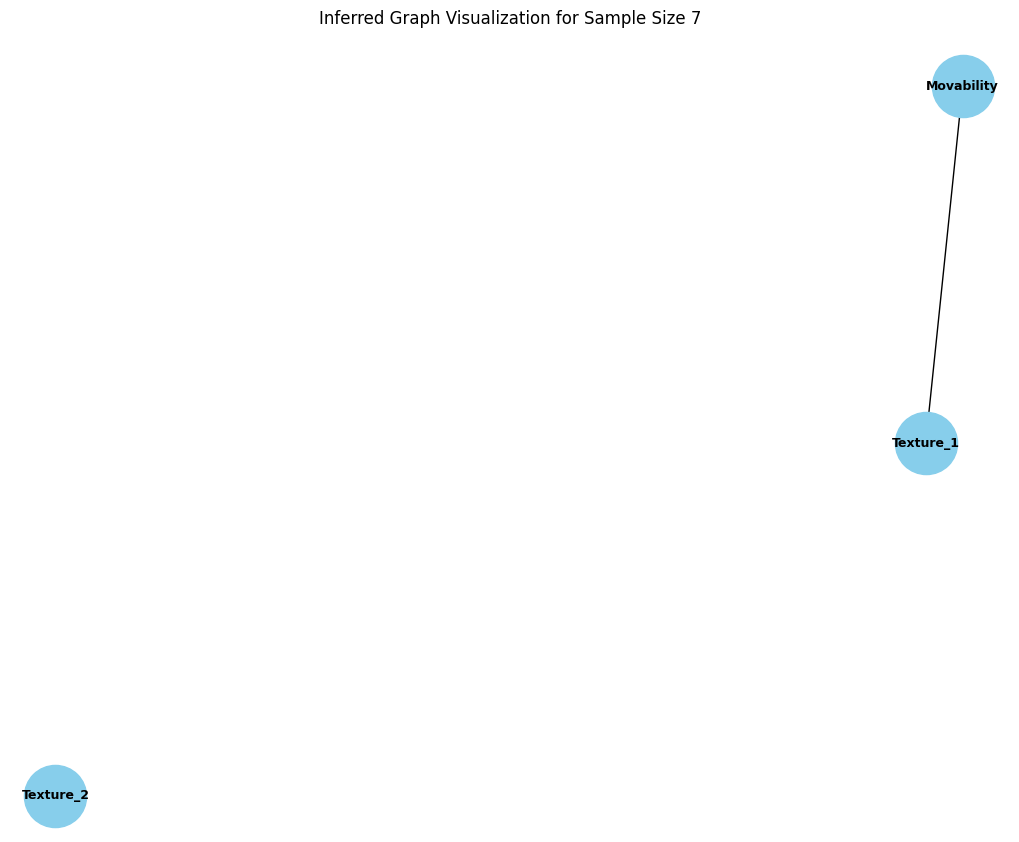

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
in

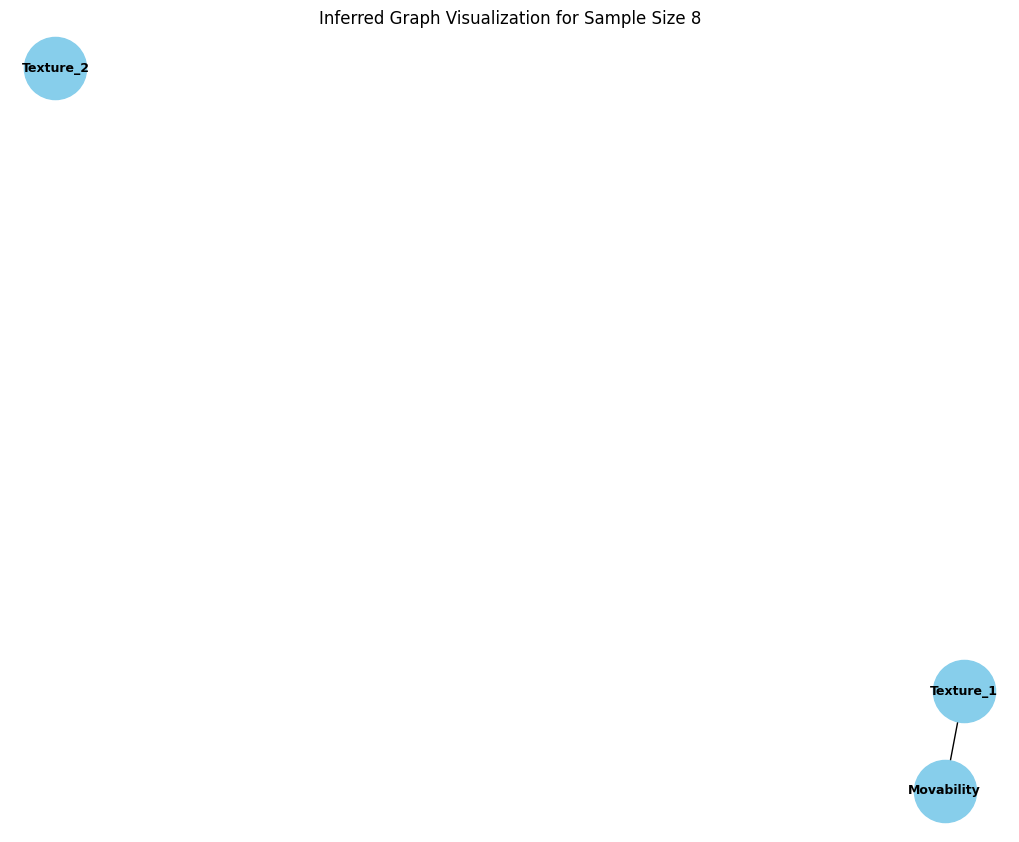

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply


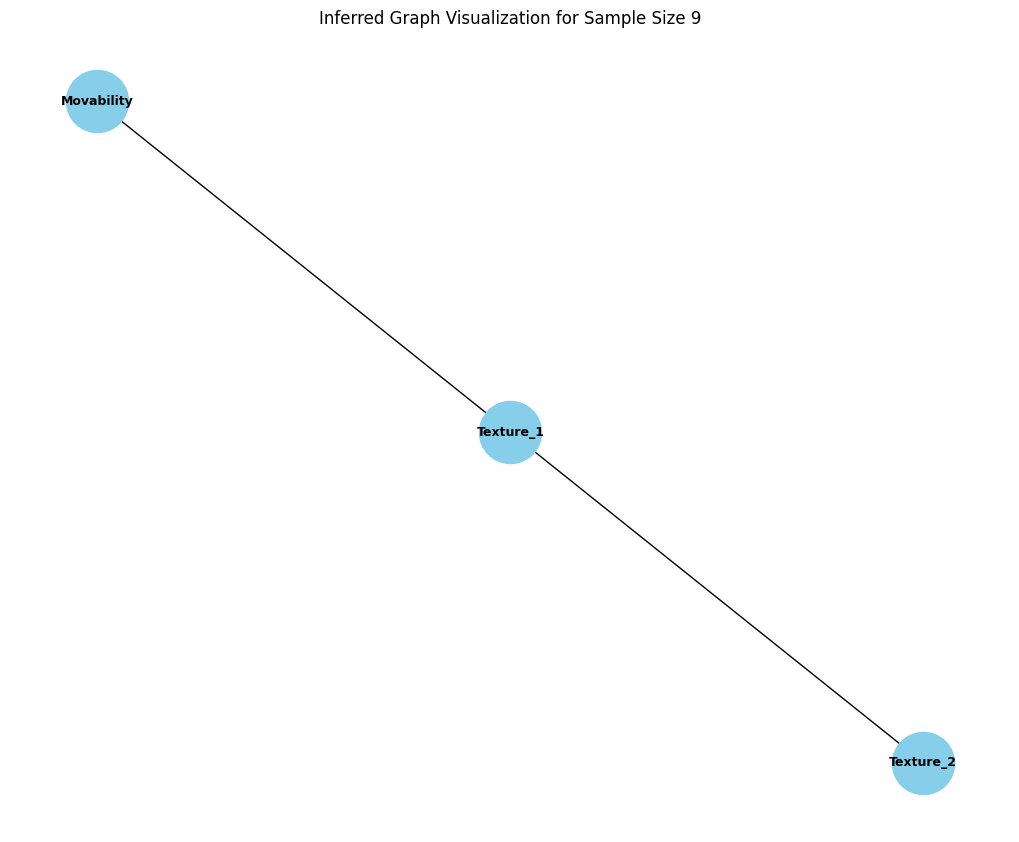

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

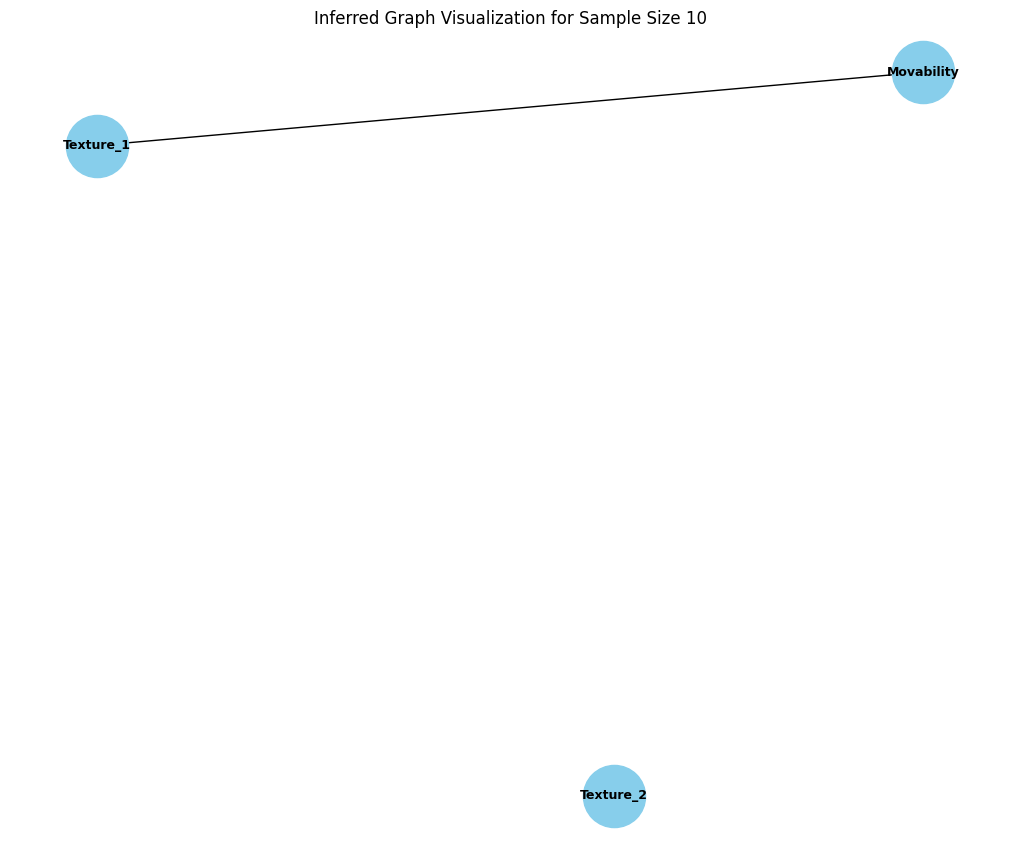

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encounter

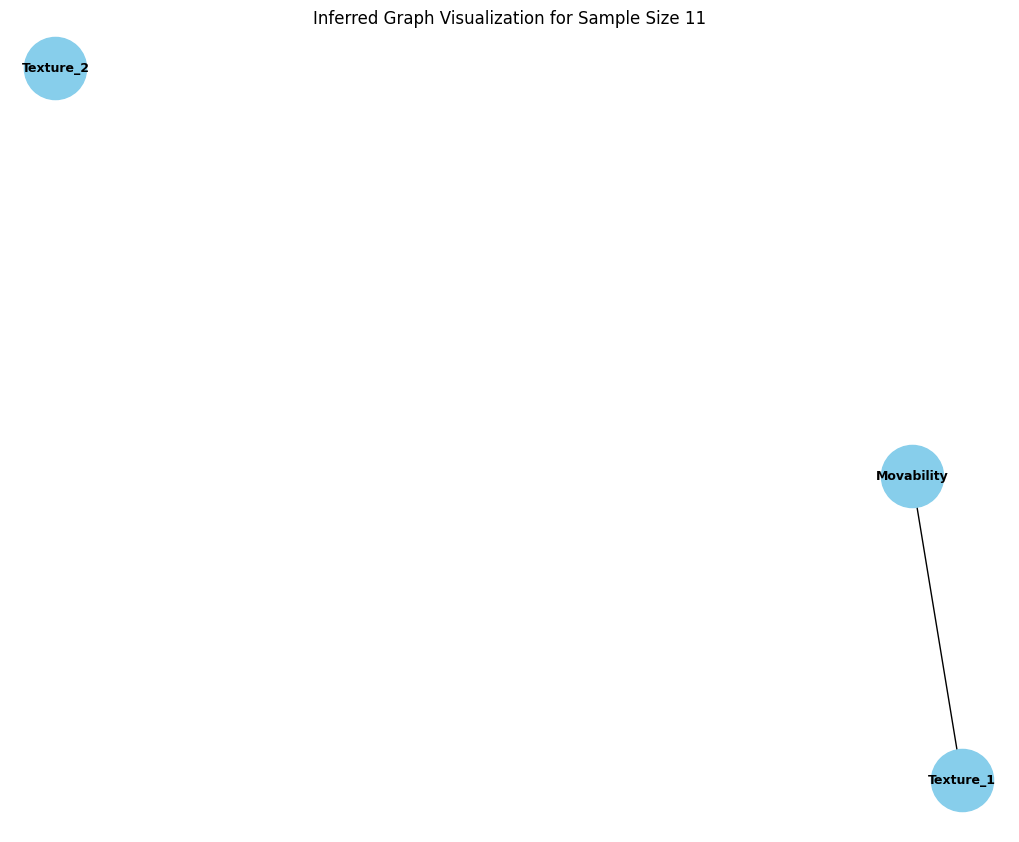

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid value encountered in multiply
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid v

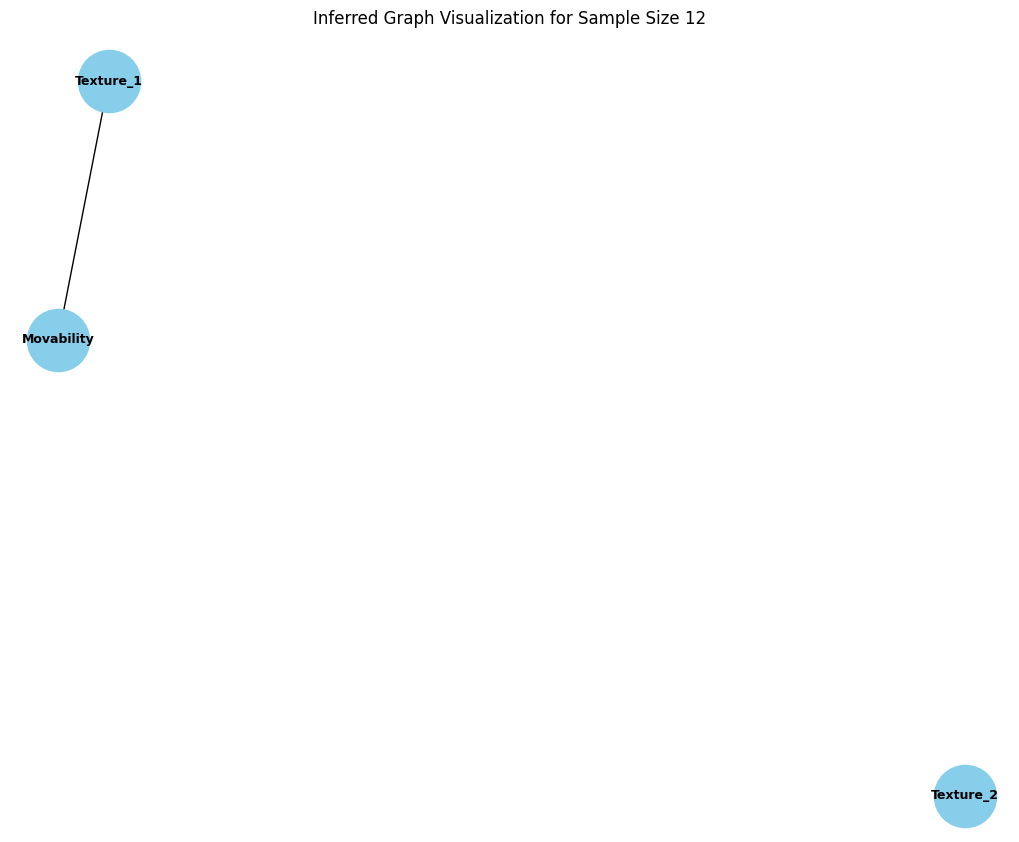

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.


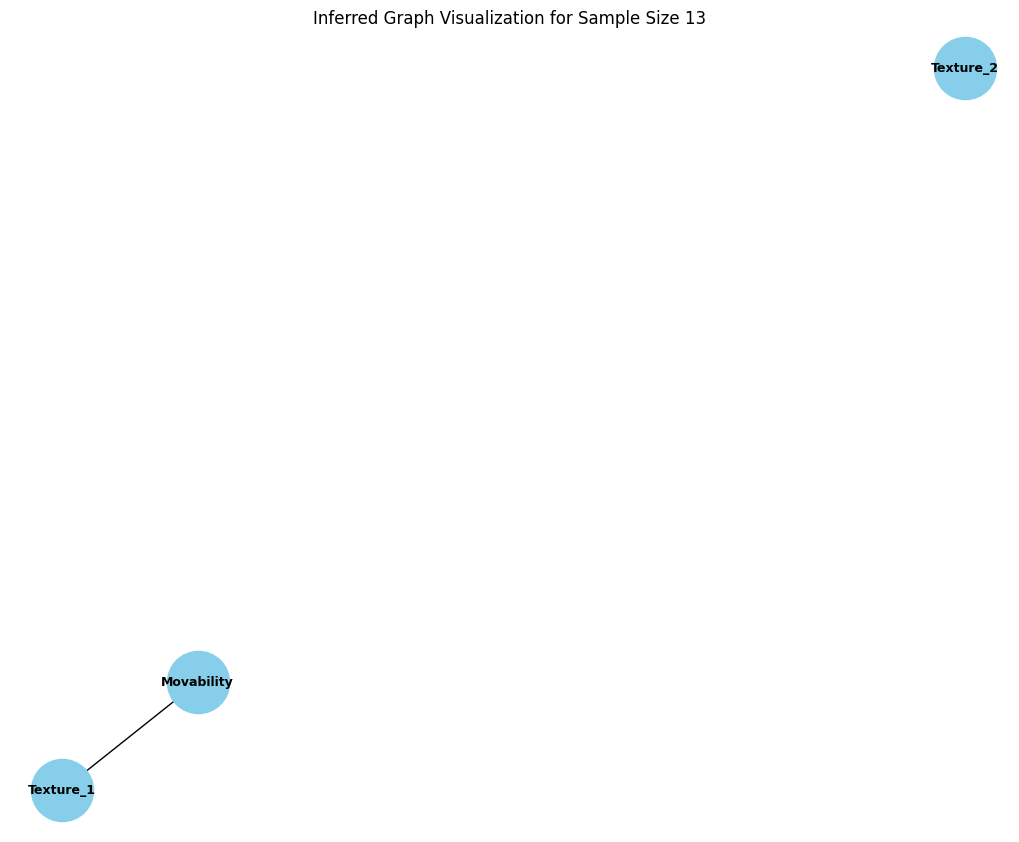

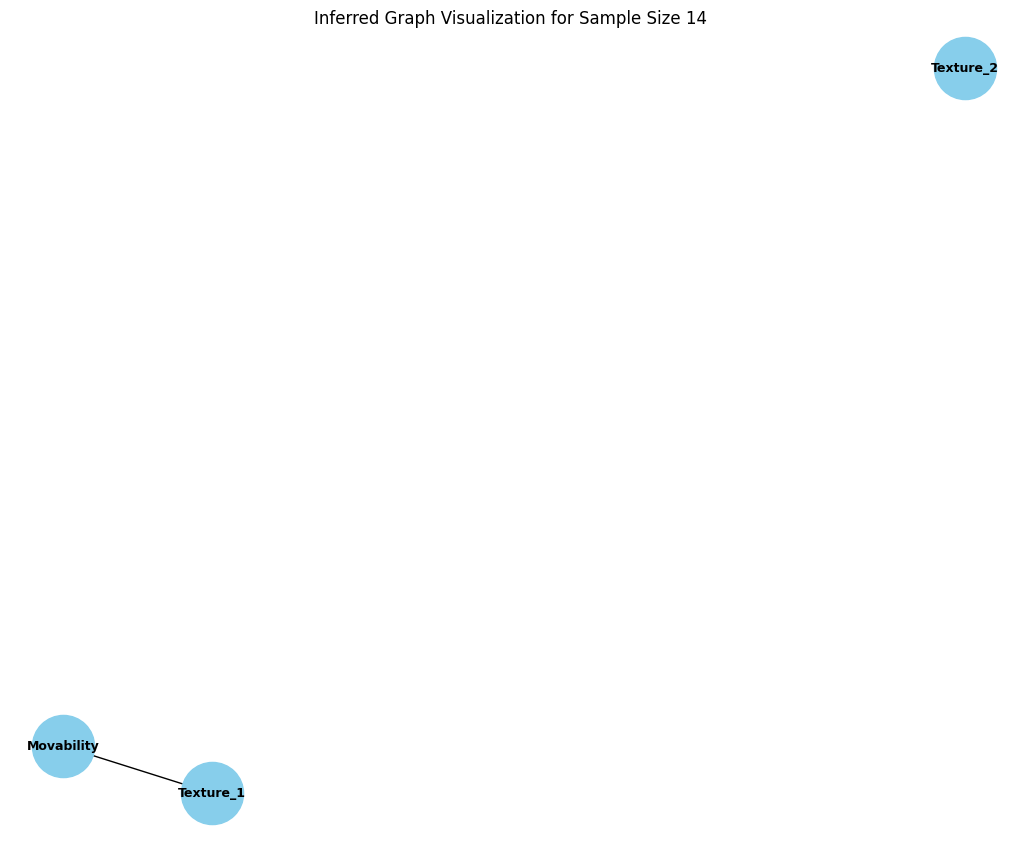

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
inv

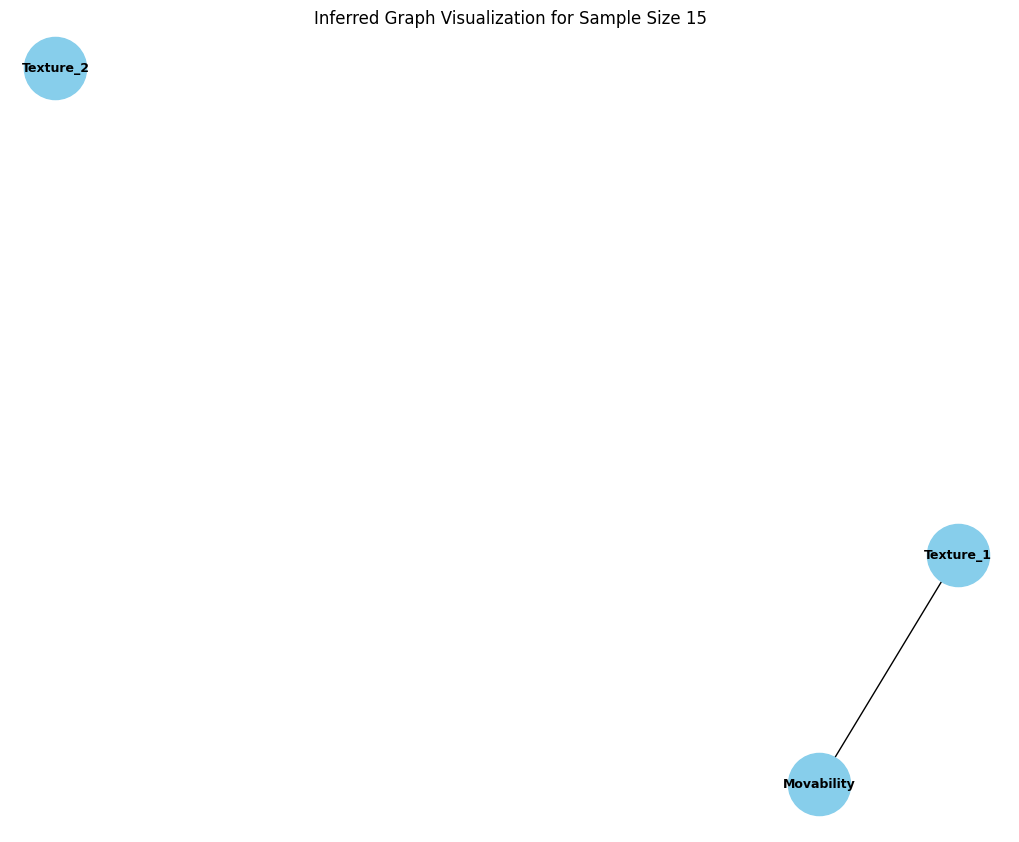

overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountere

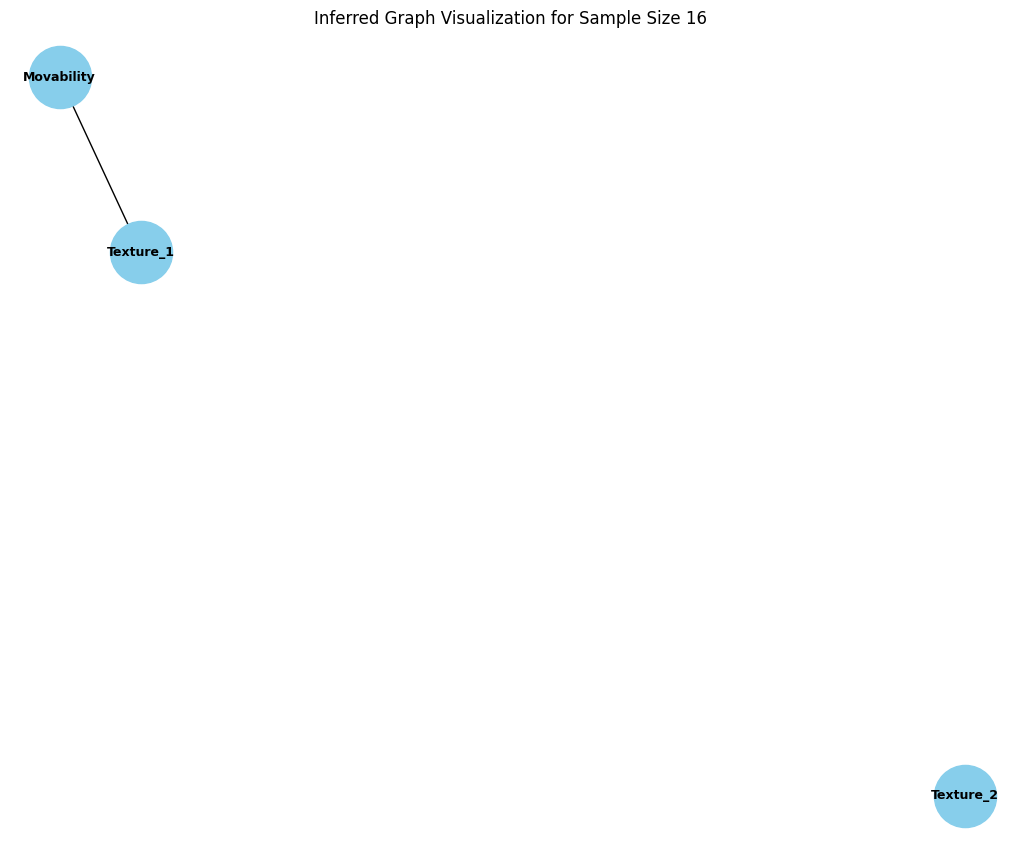

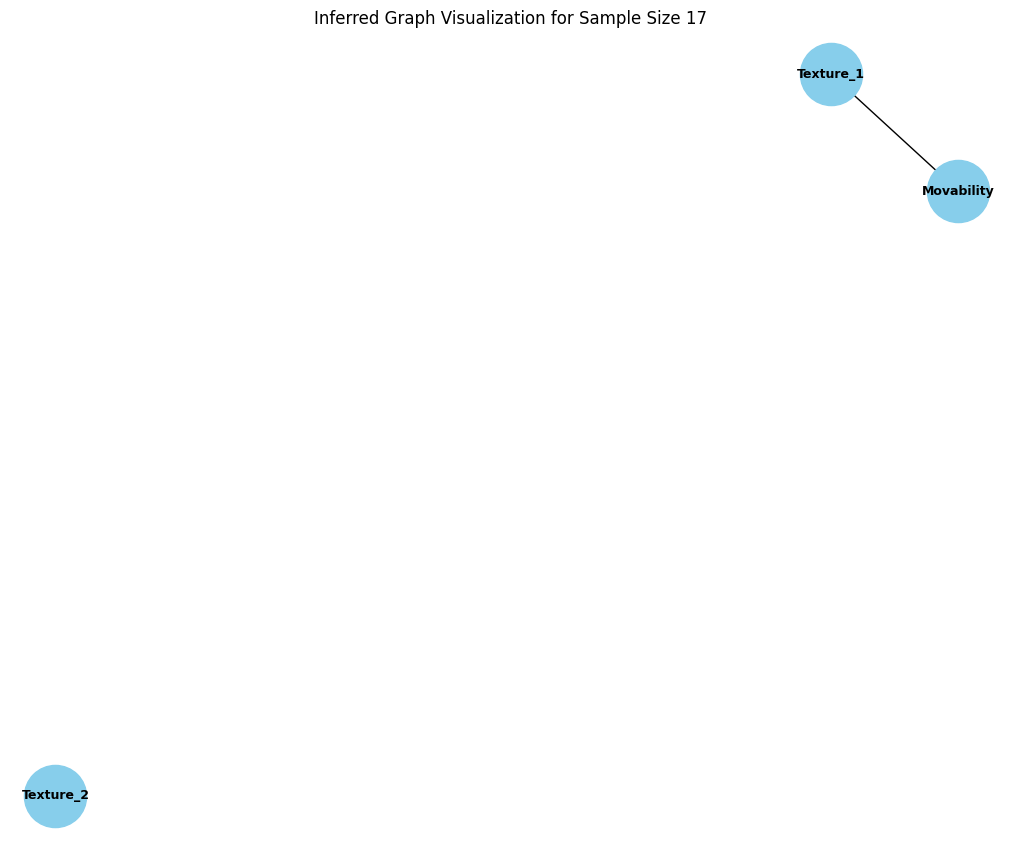

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul


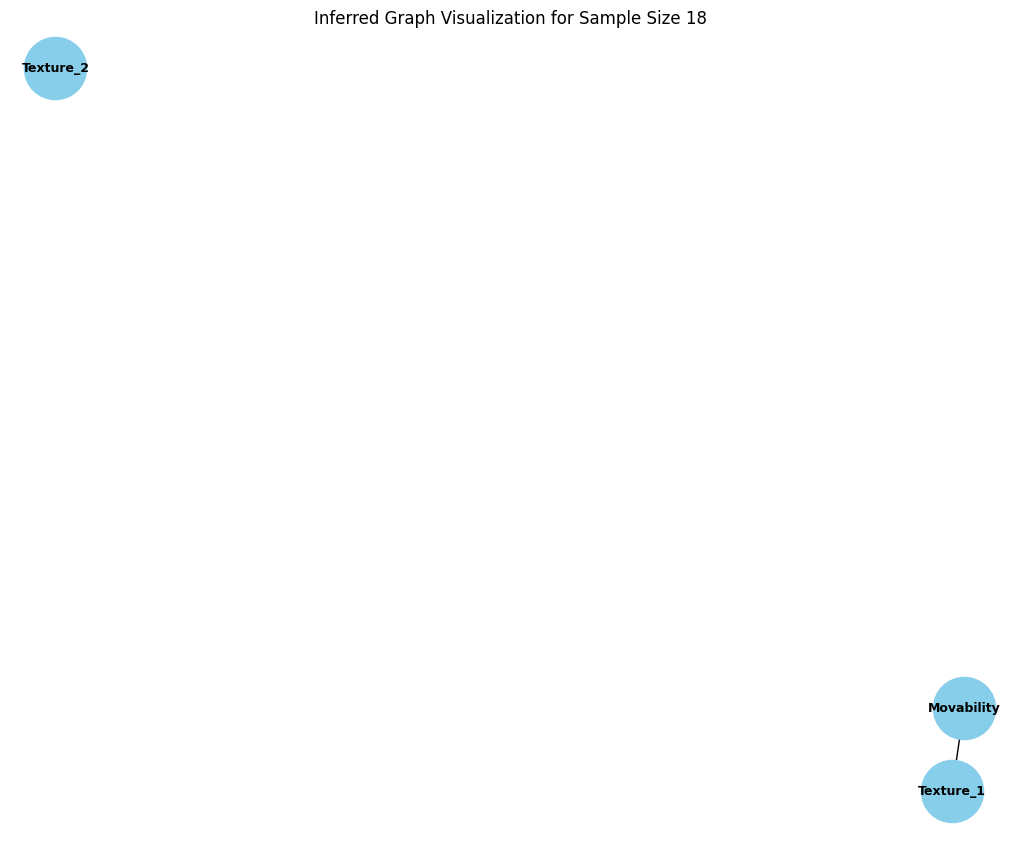

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply


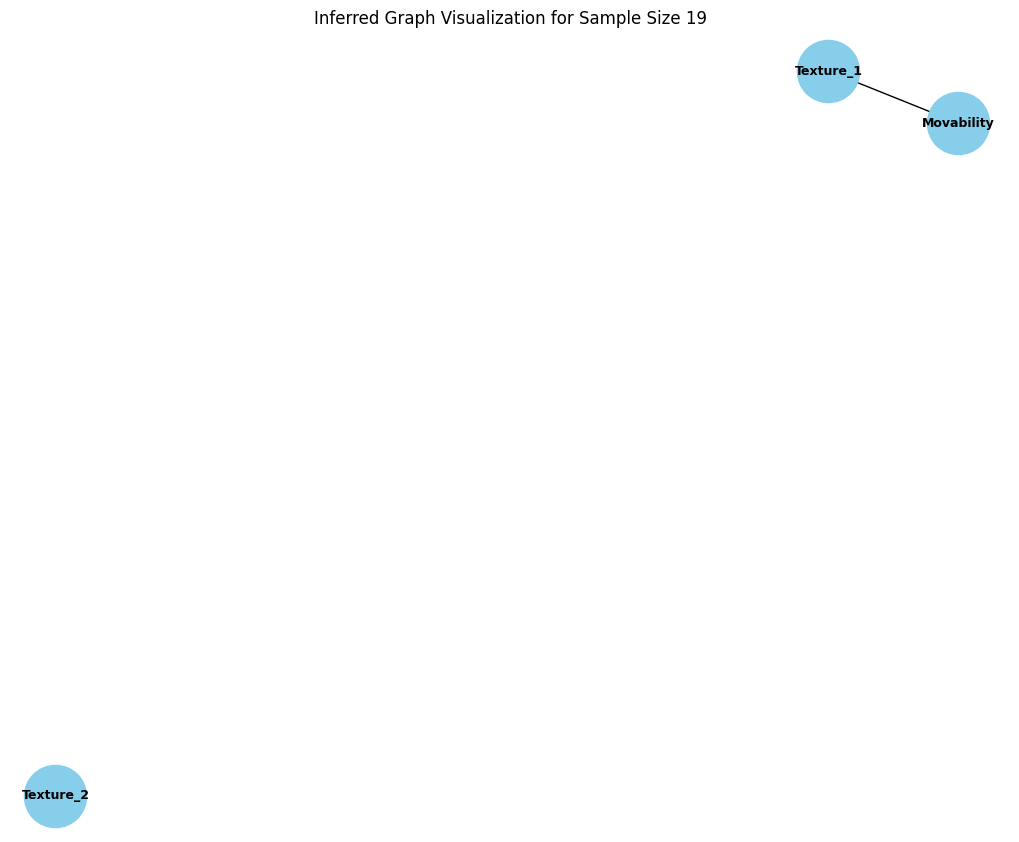

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encounter

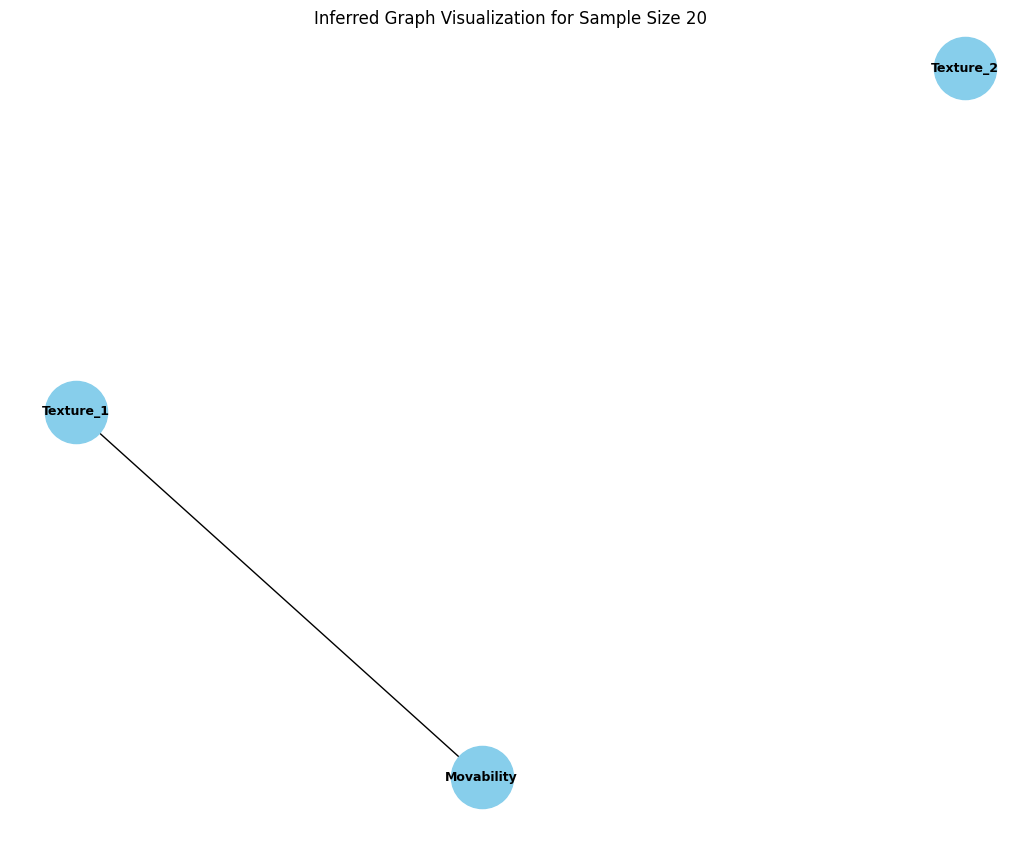

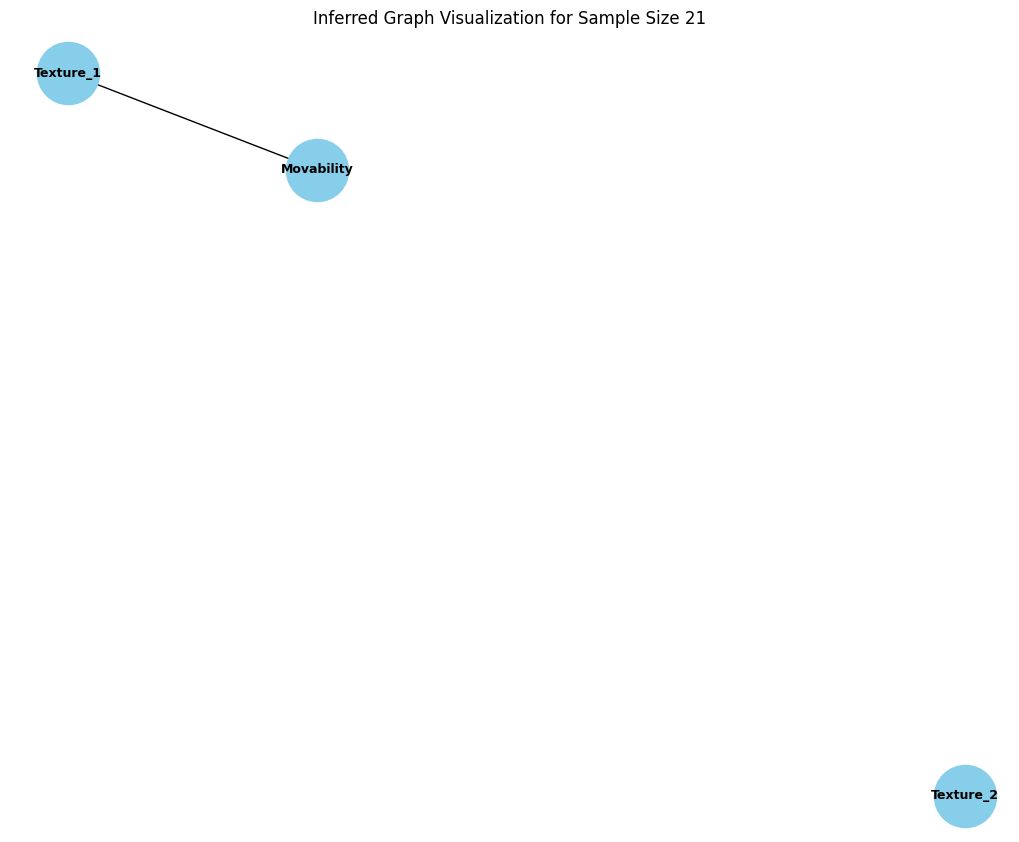

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid val

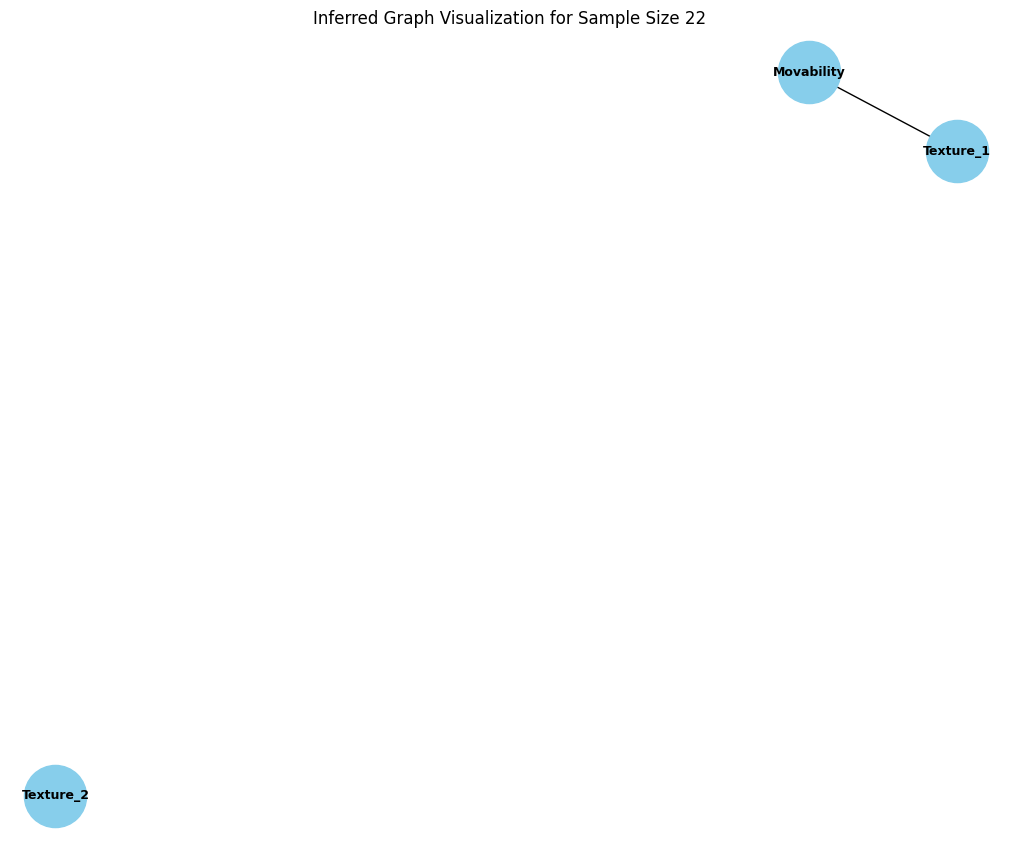

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply


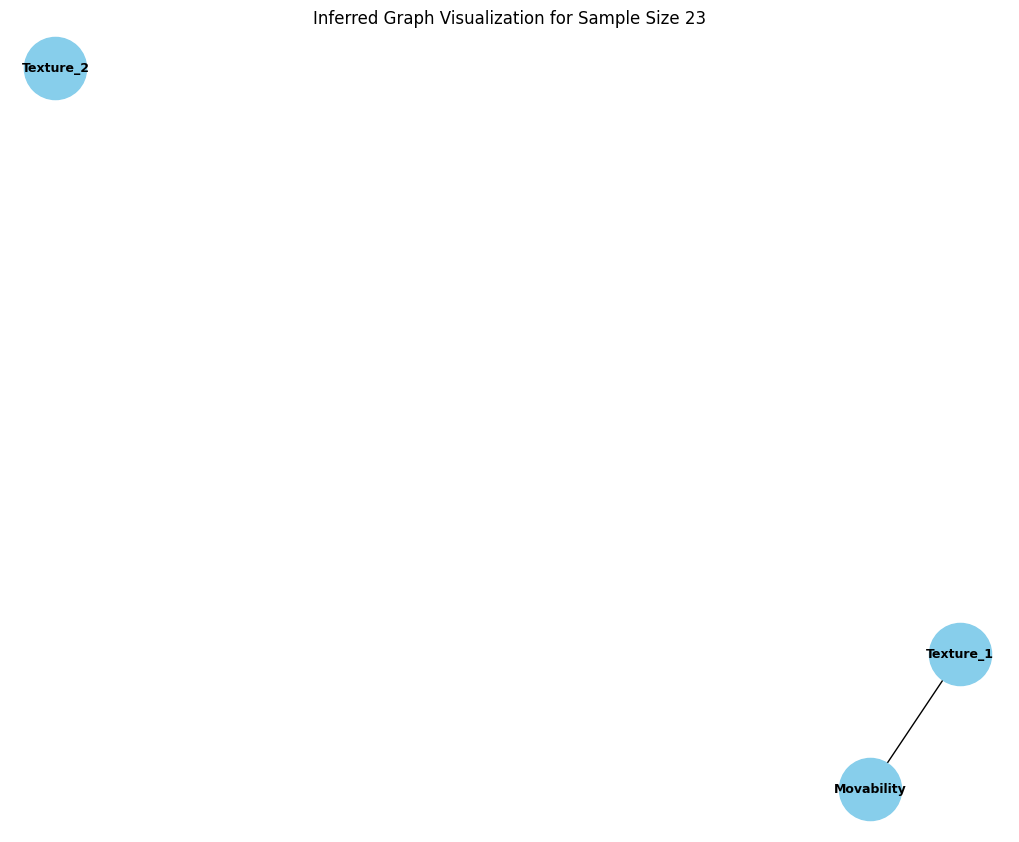

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in scalar multiply
overflow encountered in multiply
invalid value encountered in multiply
overflow encountered in scalar multiply
overflow encountered in multiply
invalid value encountered in multiply
overflow encountered in scalar multiply
overflow encountered in multiply
invalid value encountered in multip

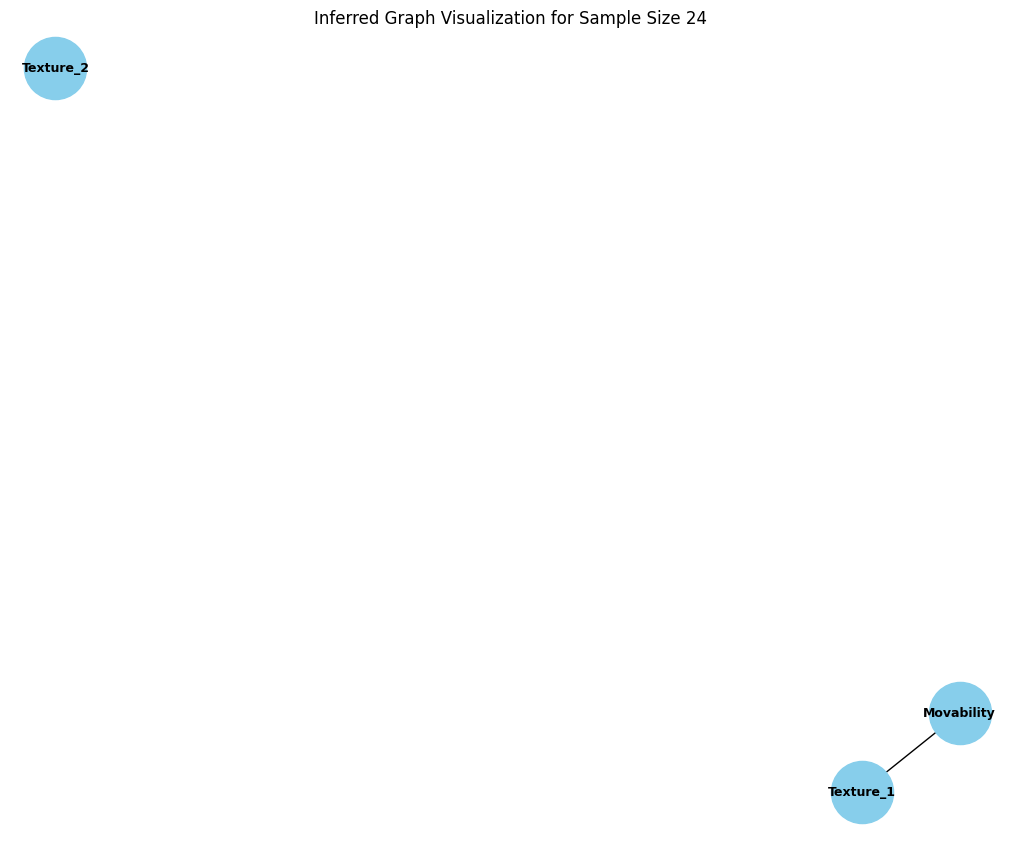

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul


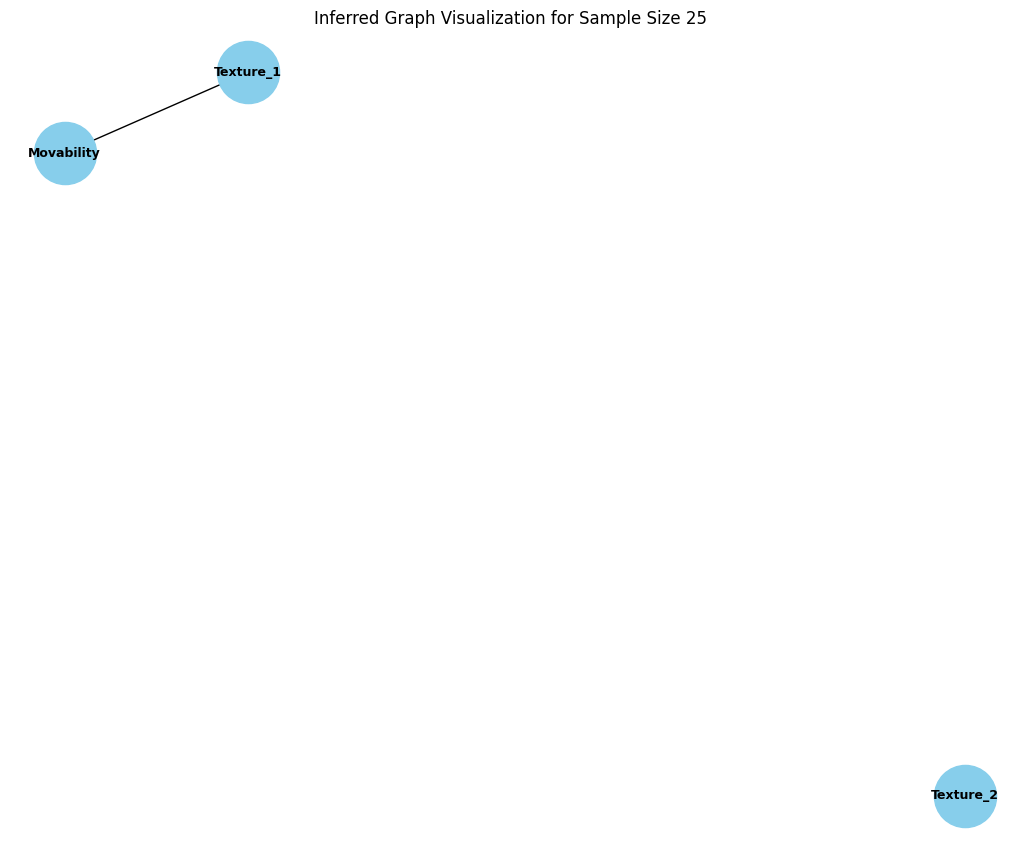

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply


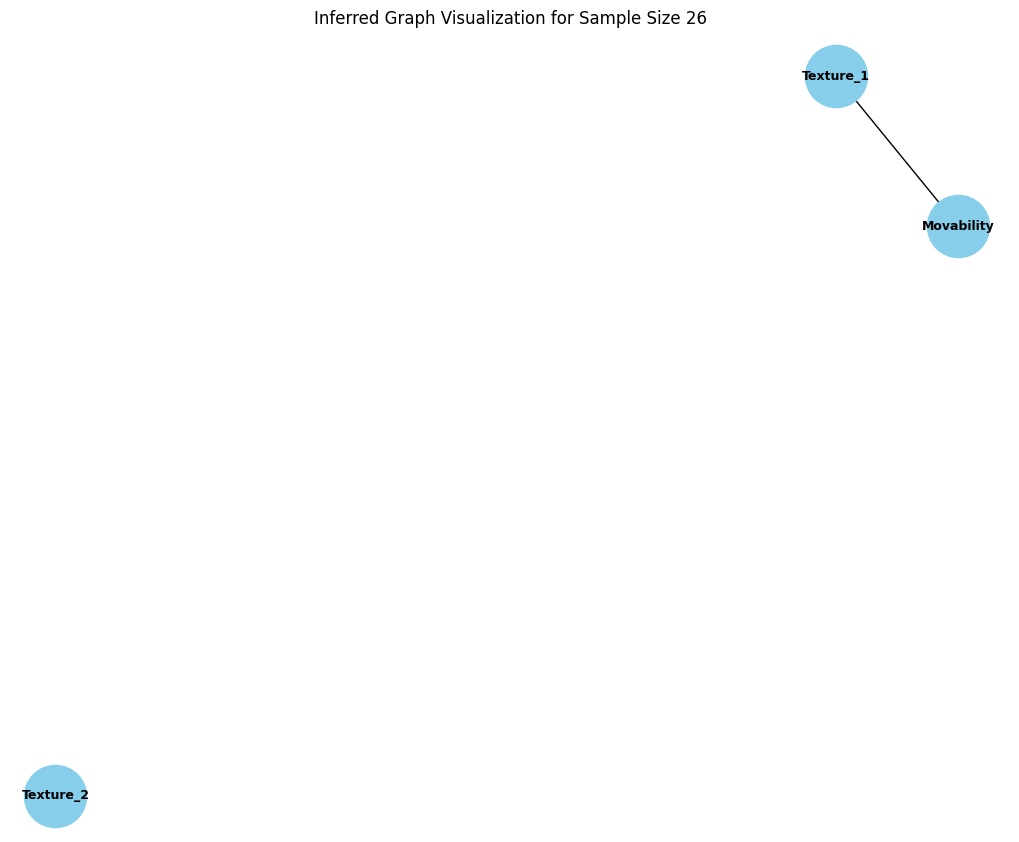

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid value encountered in multiply
No positive class found in y_true, recall is set to one for all thresholds.
overflow encountered in matmul
invalid v

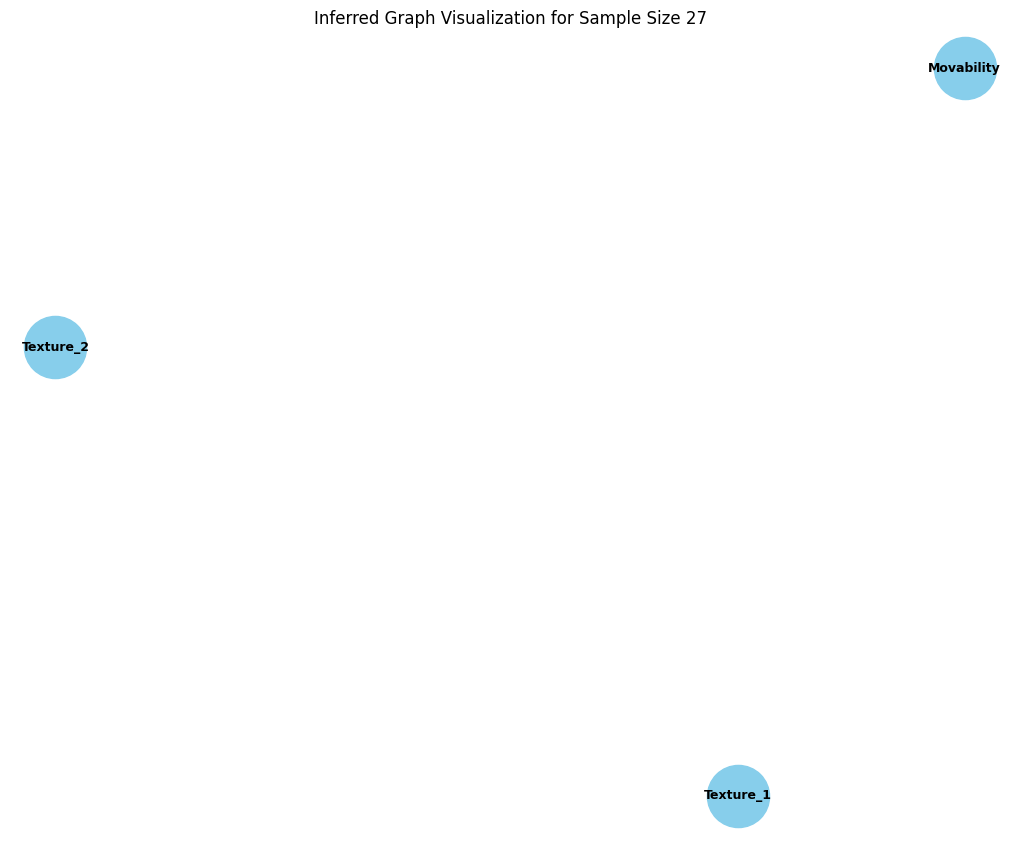

overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encounter

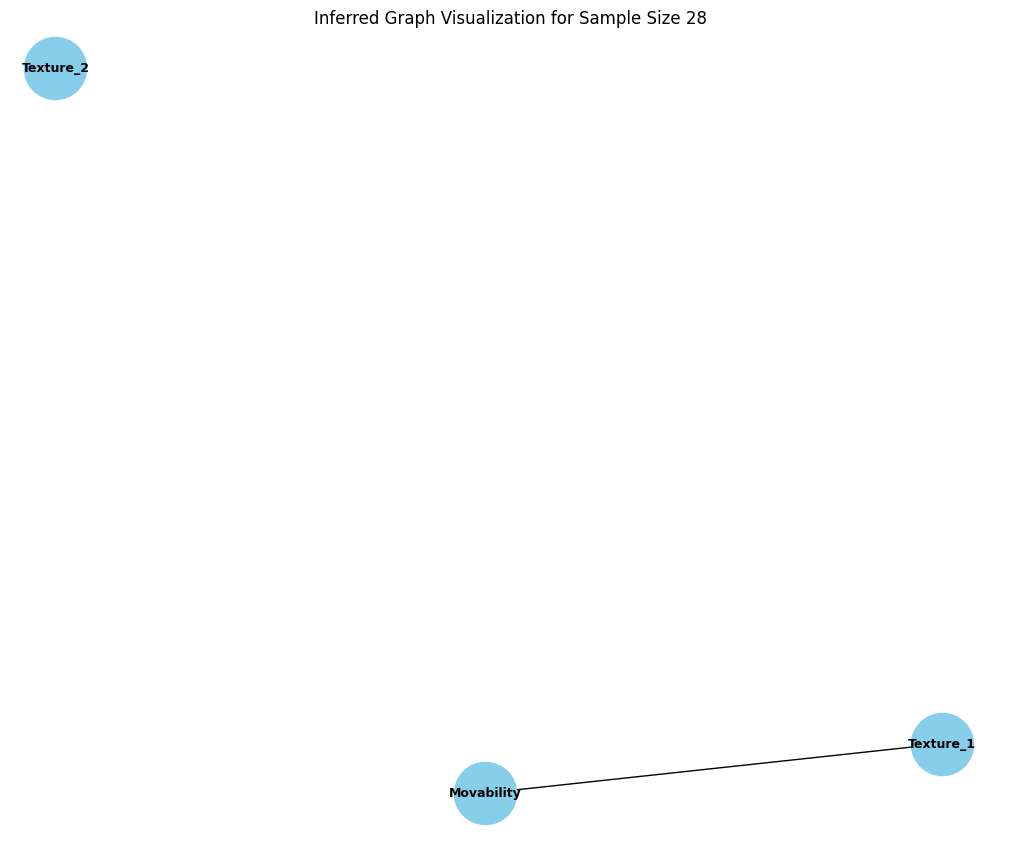

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply


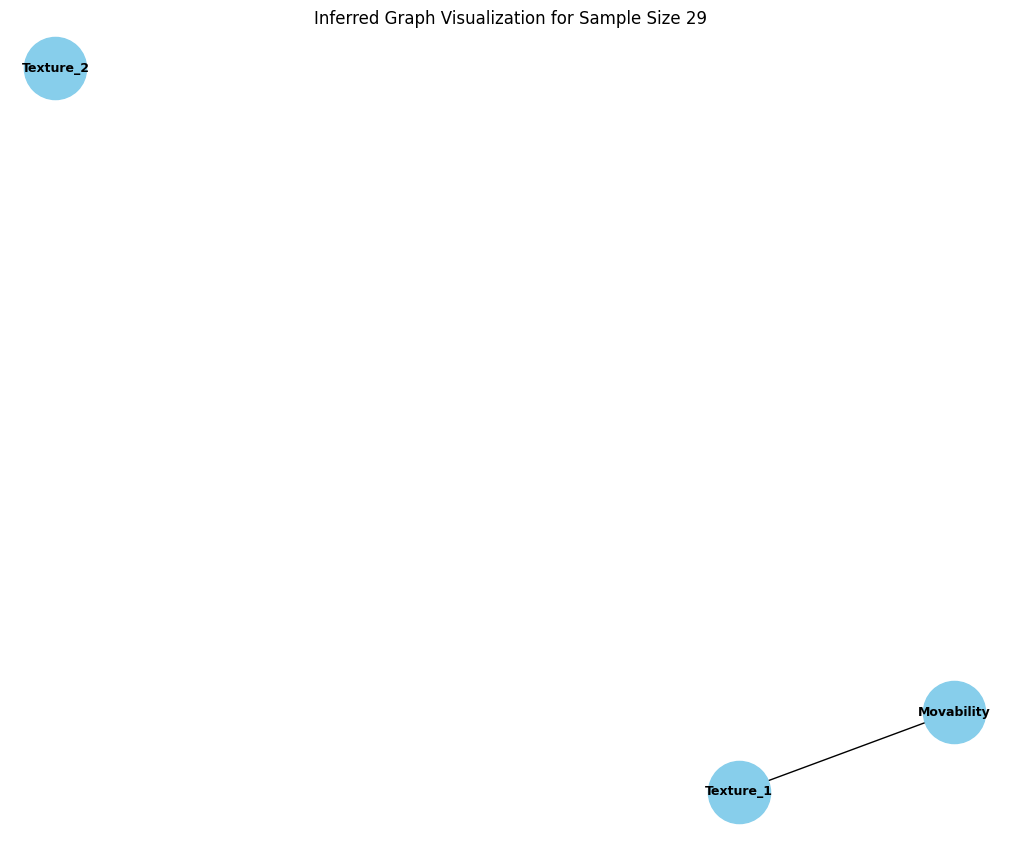

overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in multiply
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
overflow encountered in matmul
invalid val

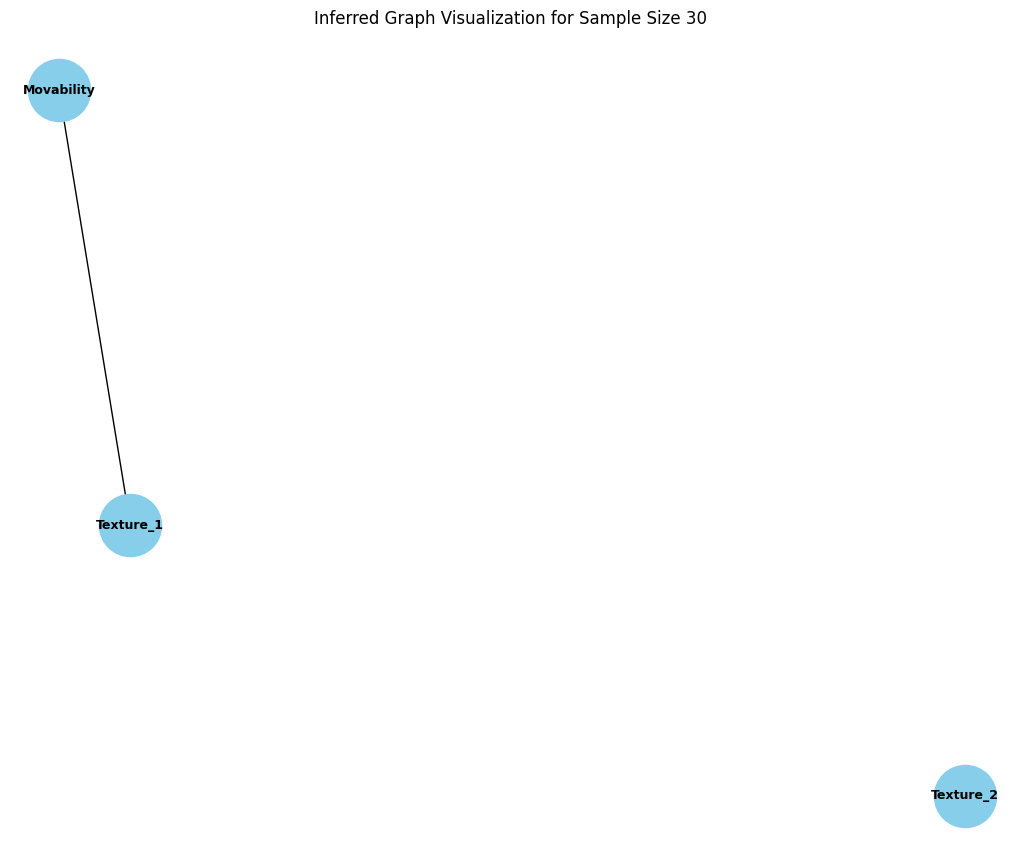

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    texture_2 = np.random.randint(0, 2, n_samples)
    movability = texture_1
    return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    G.add_edge("Texture_1", "Movability")
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.01
max_iter = 50


# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

results = []
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Visualize only one graph per sample size for clarity
    graph_to_visualize = None

    for _ in range(10):  # For each sample size, generate 10 different samples
        df = generate_data(n_samples)

        for _ in range(10):  # For each sample, perform 10 trials of graph inference
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            inferred_graph.add_nodes_from(['Texture_1', 'Texture_2', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Texture_2', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

            # Optionally, select the last inferred graph of the series for visualization
            graph_to_visualize = inferred_graph

    # Calculate average and standard deviation of SHD and precision
    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

    # Visualization of the selected graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph_to_visualize)
    nx.draw(graph_to_visualize, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_weight='bold', font_size=9)
    plt.title(f"Inferred Graph Visualization for Sample Size {n_samples}")
    plt.show()


## Both affects

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    texture_2 = np.random.randint(0, 2, n_samples)
    movability = (texture_1 & texture_2)
    return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    G.add_edge("Texture_1", "Movability")
    G.add_edge("Texture_2", "Movability")
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.01
max_iter = 50

# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(10):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(10):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            inferred_graph.add_nodes_from(['Texture_1', 'Texture_2', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Texture_2', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision
    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# Convert results to a DataFrame for display
results_32_df = pd.DataFrame(results)



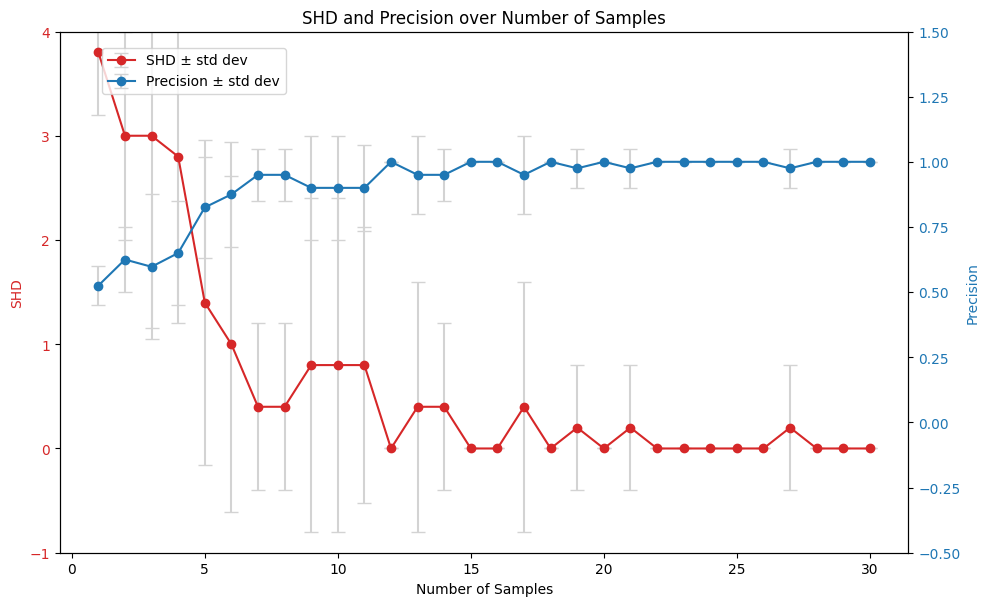

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for SHD
color_shd = 'tab:red'
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('SHD', color=color_shd)
ax1.errorbar(results_32_df['n_samples'], results_32_df['shd_avg'], yerr=results_32_df['shd_std'],
             fmt='o-', color=color_shd, ecolor='lightgray', capsize=5, label='SHD ± std dev')
ax1.tick_params(axis='y', labelcolor=color_shd)
ax1.set_ylim(-1, 4)  # Set the limit for SHD axis

# Second y-axis for Precision
ax2 = ax1.twinx()
color_precision = 'tab:blue'
ax2.set_ylabel('Precision', color=color_precision)
ax2.errorbar(results_32_df['n_samples'], results_32_df['precision_avg'], yerr=results_32_df['precision_std'],
             fmt='o-', color=color_precision, ecolor='lightgray', capsize=5, label='Precision ± std dev')
ax2.tick_params(axis='y', labelcolor=color_precision)
ax2.set_ylim(-0.5, 1.5)  # Set the limit for Precision axis

# Title and legend
fig.tight_layout()
plt.title('SHD and Precision over Number of Samples')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))  # Adjust legend position

plt.show()


In [ ]:
print(results_32_df)

    n_samples  shd_avg   shd_std  precision_avg  precision_std
0           1      3.8  0.600000       0.525000       0.075000
1           2      3.0  1.000000       0.625000       0.125000
2           3      3.0  1.843909       0.597222       0.277569
3           4      2.8  1.600000       0.650000       0.200000
4           5      1.4  1.562050       0.825000       0.195256
5           6      1.0  1.612452       0.875000       0.201556
6           7      0.4  0.800000       0.950000       0.100000
7           8      0.4  0.800000       0.950000       0.100000
8           9      0.8  1.600000       0.900000       0.200000
9          10      0.8  1.600000       0.900000       0.200000
10         11      0.8  1.326650       0.900000       0.165831
11         12      0.0  0.000000       1.000000       0.000000
12         13      0.4  1.200000       0.950000       0.150000
13         14      0.4  0.800000       0.950000       0.100000
14         15      0.0  0.000000       1.000000       0

## None affects

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    texture_2 = np.random.randint(0, 2, n_samples)
    movability = np.random.randint(0, 2, n_samples)
    return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    #precision = precision_score(inferred_edges.astype(int), true_edges.astype(int))
        # If there are no true edges and no predicted edges, precision is 1.
    # Otherwise, calculate normally.
    if true_edges.sum() == 0 and inferred_edges.sum() == 0:
        precision = 1.0
    else:
        precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.01
max_iter = 50

# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#sample_sizes = [5,10,15,20,30]

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(10):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(10):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            inferred_graph.add_nodes_from(['Texture_1', 'Texture_2', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Texture_2', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision
    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# Convert results to a DataFrame for display
results_30_df = pd.DataFrame(results)


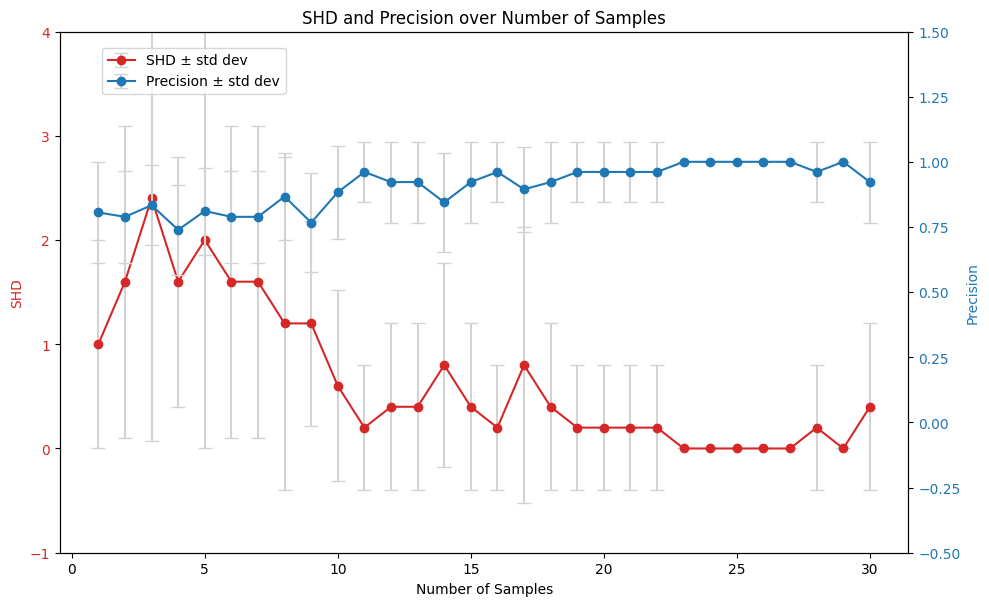

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for SHD
color_shd = 'tab:red'
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('SHD', color=color_shd)
ax1.errorbar(results_30_df['n_samples'], results_30_df['shd_avg'], yerr=results_30_df['shd_std'],
             fmt='o-', color=color_shd, ecolor='lightgray', capsize=5, label='SHD ± std dev')
ax1.tick_params(axis='y', labelcolor=color_shd)
ax1.set_ylim(-1, 4)  # Set the limit for SHD axis

# Second y-axis for Precision
ax2 = ax1.twinx()
color_precision = 'tab:blue'
ax2.set_ylabel('Precision', color=color_precision)
ax2.errorbar(results_30_df['n_samples'], results_30_df['precision_avg'], yerr=results_30_df['precision_std'],
             fmt='o-', color=color_precision, ecolor='lightgray', capsize=5, label='Precision ± std dev')
ax2.tick_params(axis='y', labelcolor=color_precision)
ax2.set_ylim(-0.5, 1.5)  # Set the limit for Precision axis

# Title and legend
fig.tight_layout()
plt.title('SHD and Precision over Number of Samples')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))  # Adjust legend position

plt.show()

In [ ]:
print(results_30_df)

    n_samples  shd_avg   shd_std  precision_avg  precision_std
0           1      1.0  1.000000       0.805556       0.194444
1           2      1.6  1.496663       0.788889       0.177082
2           3      2.4  2.332381       0.833333       0.153156
3           4      1.6  1.200000       0.738889       0.174005
4           5      2.0  2.000000       0.811111       0.167037
5           6      1.6  1.496663       0.788889       0.177082
6           7      1.6  1.496663       0.788889       0.177082
7           8      1.2  1.600000       0.866667       0.167037
8           9      1.2  0.979796       0.766667       0.190516
9          10      0.6  0.916515       0.883333       0.178211
10         11      0.2  0.600000       0.961111       0.116667
11         12      0.4  0.800000       0.922222       0.155556
12         13      0.4  0.800000       0.922222       0.155556
13         14      0.8  0.979796       0.844444       0.190516
14         15      0.4  0.800000       0.922222       0

# Two variables

## Affect

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    #texture_2 = np.random.randint(0, 2, n_samples)
    movability = texture_1
    #return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})
    return pd.DataFrame({'Texture_1': texture_1, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    #G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    G.add_nodes_from(["Texture_1", "Movability"])
    G.add_edge("Texture_1", "Movability")
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.001
max_iter = 50


# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#sample_sizes = [2,5,10,15,20,25]
#sample_sizes = [5,10,15,20,25,30,35,40]

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(10):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(10):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            #inferred_graph.add_nodes_from(['Texture_1', 'Texture_2', 'Movability'])
            inferred_graph.add_nodes_from(['Texture_1', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            #shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Texture_2', 'Movability'])
            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision

    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# Convert results to a DataFrame for display
results_21_df = pd.DataFrame(results)



In [26]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    #texture_2 = np.random.randint(0, 2, n_samples)
    movability = texture_1
    #return pd.DataFrame({'Texture_1': texture_1, 'Texture_2': texture_2, 'Movability': movability})
    return pd.DataFrame({'Texture_1': texture_1, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    #G.add_nodes_from(["Texture_1", "Texture_2", "Movability"])
    G.add_nodes_from(["Texture_1", "Movability"])
    G.add_edge("Texture_1", "Movability")
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.001
max_iter = 50


# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#sample_sizes = [2,5,10,15,20,25]
#sample_sizes = [5,10,15,20,25,30,35,40]

# ... [rest of your code before this] ...

# ... [rest of your code before this] ...

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(10):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(10):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.DiGraph()
            inferred_graph.add_nodes_from(['Texture_1', 'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Movability'])

            # If SHD is greater than 1, set it to 1
            shd = min(shd, 1)

            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision
    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# ... [rest of your code after this, such as DataFrame creation and plotting] ...



# Convert results to a DataFrame for display
results_21_df = pd.DataFrame(results)

No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive class found in y_true, recall is set to one for all thresholds.
No positive 

In [29]:
print(results_21_df)

    n_samples  shd_avg   shd_std  precision_avg  precision_std
0           1      1.0  0.000000           0.50       0.000000
1           2      1.0  0.000000           0.50       0.000000
2           3      0.9  0.300000           0.55       0.150000
3           4      0.8  0.400000           0.60       0.200000
4           5      0.8  0.400000           0.60       0.200000
5           6      0.8  0.400000           0.60       0.200000
6           7      0.5  0.500000           0.75       0.250000
7           8      1.0  0.000000           0.50       0.000000
8           9      0.3  0.458258           0.85       0.229129
9          10      0.4  0.489898           0.80       0.244949
10         11      0.6  0.489898           0.70       0.244949
11         12      0.4  0.489898           0.80       0.244949
12         13      0.9  0.300000           0.55       0.150000
13         14      0.4  0.489898           0.80       0.244949
14         15      0.6  0.489898           0.70       0

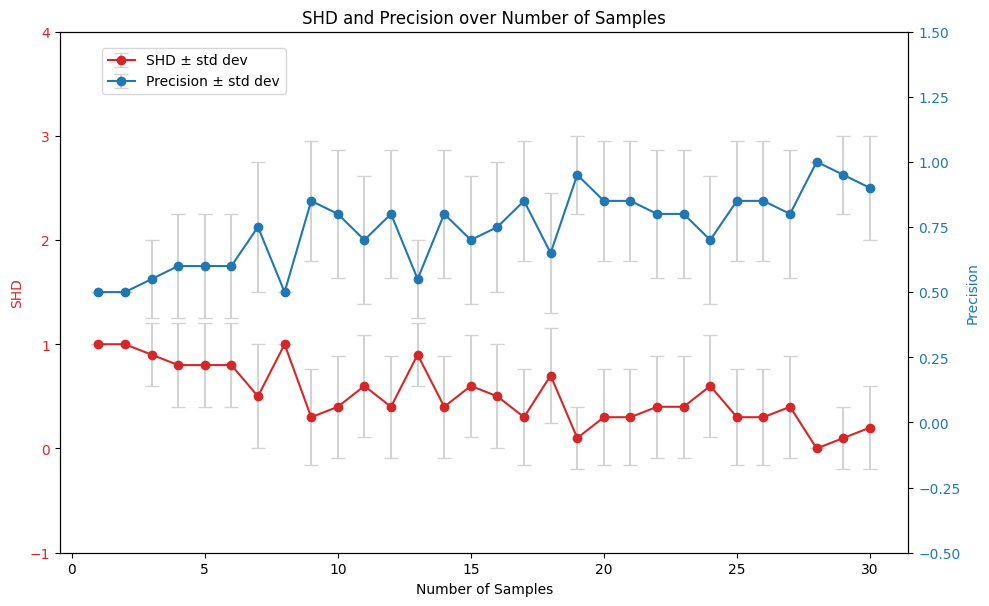

In [30]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for SHD
color_shd = 'tab:red'
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('SHD', color=color_shd)
ax1.errorbar(results_21_df['n_samples'], results_21_df['shd_avg'], yerr=results_21_df['shd_std'],
             fmt='o-', color=color_shd, ecolor='lightgray', capsize=5, label='SHD ± std dev')
ax1.tick_params(axis='y', labelcolor=color_shd)
ax1.set_ylim(-1, 4)  # Set the limit for SHD axis

# Second y-axis for Precision
ax2 = ax1.twinx()
color_precision = 'tab:blue'
ax2.set_ylabel('Precision', color=color_precision)
ax2.errorbar(results_21_df['n_samples'], results_21_df['precision_avg'], yerr=results_21_df['precision_std'],
             fmt='o-', color=color_precision, ecolor='lightgray', capsize=5, label='Precision ± std dev')
ax2.tick_params(axis='y', labelcolor=color_precision)
ax2.set_ylim(-0.5, 1.5)  # Set the limit for Precision axis

# Title and legend
fig.tight_layout()
plt.title('SHD and Precision over Number of Samples')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))  # Adjust legend position

plt.show()


## Does not affect

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.notears import from_pandas_lasso
from cdt.metrics import precision_recall, SHD
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

np.random.seed(42)  # Ensure reproducibility

def generate_data(n_samples):
    """Generates dataset based on specified relationships."""
    texture_1 = np.random.randint(0, 2, n_samples)
    movability = np.random.randint(0, 2, n_samples)
    return pd.DataFrame({'Texture_1': texture_1, 'Movability': movability})

def generate_true_graph():
    """Generates the true graph structure as a NetworkX undirected graph."""
    G = nx.Graph()
    G.add_nodes_from(["Texture_1", "Movability"])
    return G

def calculate_metrics(inferred_graph, true_graph, node_names):
    """Calculates SHD and precision between the true graph and the inferred graph."""
    # Ensure that both true_graph and inferred_graph are nx.Graph() and include all nodes
    true_adj_matrix = nx.to_numpy_array(true_graph, nodelist=node_names)
    inferred_adj_matrix = nx.to_numpy_array(inferred_graph, nodelist=node_names)

    # Symmetrize the adjacency matrices for undirected graph comparison
    true_adj_matrix = np.maximum(true_adj_matrix, true_adj_matrix.T)
    inferred_adj_matrix = np.maximum(inferred_adj_matrix, inferred_adj_matrix.T)

    # Calculate SHD
    shd = SHD(true_adj_matrix, inferred_adj_matrix)

    # Calculate precision and recall using cdt.metrics.precision_recall
    # Flatten the adjacency matrices to compare edge presence as binary arrays
    true_edges = true_adj_matrix.flatten()
    inferred_edges = inferred_adj_matrix.flatten()
    #precision = precision_score(inferred_edges.astype(int), true_edges.astype(int))
        # If there are no true edges and no predicted edges, precision is 1.
    # Otherwise, calculate normally.
    if true_edges.sum() == 0 and inferred_edges.sum() == 0:
        precision = 1.0
    else:
        precision, recall = precision_recall(inferred_edges.astype(int), true_edges.astype(int))

    return shd, precision

# Hyperparameters
w_threshold = 0.8
beta = 0.01
max_iter = 50

# Generate the true graph for comparison
true_graph = generate_true_graph()

# Sample sizes to iterate over
sample_sizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
#sample_sizes = [5,10,15,20,30]

# Results placeholder
results = []

# Loop over sample sizes
for n_samples in sample_sizes:
    shd_values = []
    precision_values = []

    # Generate 10 different samples for each sample size
    for _ in range(10):
        df = generate_data(n_samples)

        # For each sample, perform 10 trials of graph inference
        for _ in range(10):
            sm = from_pandas_lasso(df, w_threshold=w_threshold, beta=beta, max_iter=max_iter)
            # Create an inferred graph and ensure all nodes are present
            inferred_graph = nx.Graph()
            inferred_graph.add_nodes_from(['Texture_1',  'Movability'])
            inferred_graph.add_edges_from(sm.edges())

            shd, precision = calculate_metrics(inferred_graph, true_graph, node_names=['Texture_1', 'Movability'])
            shd_values.append(shd)
            precision_values.append(precision)

    # Calculate average and standard deviation of SHD and precision
    results.append({
        'n_samples': n_samples,
        'shd_avg': np.mean(shd_values),
        'shd_std': np.std(shd_values),
        'precision_avg': np.mean(precision_values),
        'precision_std': np.std(precision_values)
    })

# Convert results to a DataFrame for display
results_20_df = pd.DataFrame(results)


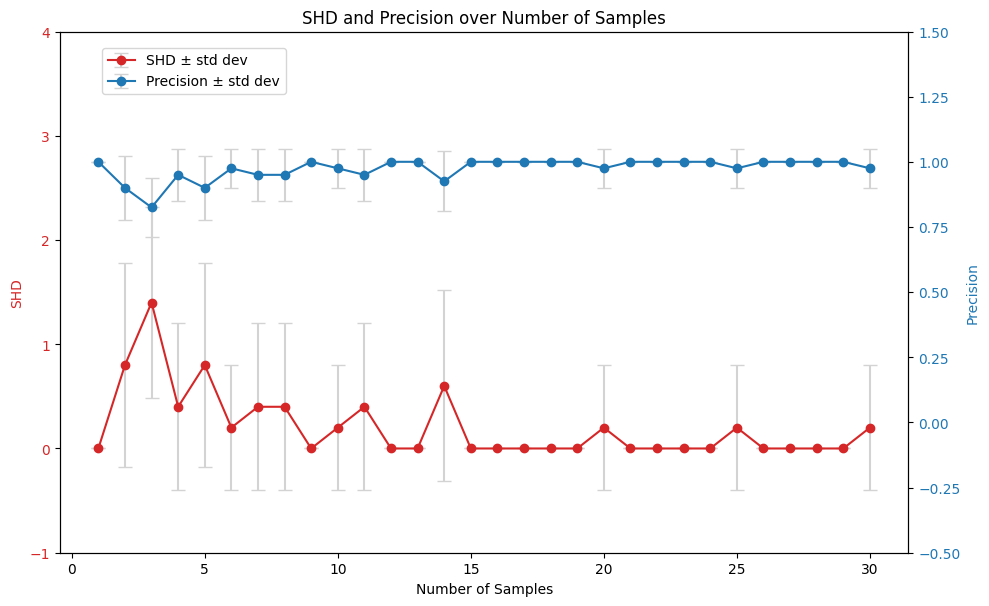

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for SHD
color_shd = 'tab:red'
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('SHD', color=color_shd)
ax1.errorbar(results_20_df['n_samples'], results_20_df['shd_avg'], yerr=results_20_df['shd_std'],
             fmt='o-', color=color_shd, ecolor='lightgray', capsize=5, label='SHD ± std dev')
ax1.tick_params(axis='y', labelcolor=color_shd)
ax1.set_ylim(-1, 4)  # Set the limit for SHD axis

# Second y-axis for Precision
ax2 = ax1.twinx()
color_precision = 'tab:blue'
ax2.set_ylabel('Precision', color=color_precision)
ax2.errorbar(results_20_df['n_samples'], results_20_df['precision_avg'], yerr=results_20_df['precision_std'],
             fmt='o-', color=color_precision, ecolor='lightgray', capsize=5, label='Precision ± std dev')
ax2.tick_params(axis='y', labelcolor=color_precision)
ax2.set_ylim(-0.5, 1.5)  # Set the limit for Precision axis

# Title and legend
fig.tight_layout()
plt.title('SHD and Precision over Number of Samples')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))  # Adjust legend position

plt.show()


In [ ]:
print(results_20_df)

    n_samples  shd_avg   shd_std  precision_avg  precision_std
0           1      0.0  0.000000          1.000       0.000000
1           2      0.8  0.979796          0.900       0.122474
2           3      1.4  0.916515          0.825       0.114564
3           4      0.4  0.800000          0.950       0.100000
4           5      0.8  0.979796          0.900       0.122474
5           6      0.2  0.600000          0.975       0.075000
6           7      0.4  0.800000          0.950       0.100000
7           8      0.4  0.800000          0.950       0.100000
8           9      0.0  0.000000          1.000       0.000000
9          10      0.2  0.600000          0.975       0.075000
10         11      0.4  0.800000          0.950       0.100000
11         12      0.0  0.000000          1.000       0.000000
12         13      0.0  0.000000          1.000       0.000000
13         14      0.6  0.916515          0.925       0.114564
14         15      0.0  0.000000          1.000       0